In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
def ler_csv(file, separador, encode, zebrado=False):
    return pd.read_csv(file, sep=separador, encoding=encode, squeeze = zebrado)

In [45]:
def medias_regiao(df_ori, regiao):
    df = df_ori[df_ori['CO_REGIAO']==regiao] #'MEDIA_5EF_LP', 'MEDIA_5EF_MT'
    
    df_LP = df[df['MEDIA_5EF_LP']!=0]
    df_media_LP = df_LP['MEDIA_5EF_LP'].sum()/len(df_LP['MEDIA_5EF_LP'])
    
    df_MT = df[df['MEDIA_5EF_MT']!=0]
    df_media_MT = df_MT['MEDIA_5EF_MT'].sum()/len(df_MT['MEDIA_5EF_MT'])
    return (df_media_LP,df_media_MT)

In [88]:
df_ESC = ler_csv("ESCOLAS.CSV", '|', 'iso-8859-1', True)
df_PU_ESC= ler_csv("ESCOLA_publicas.csv", ',', 'iso-8859-1', True)
df_TS_ESC= ler_csv("TS_ESCOLA.csv", ',', 'iso-8859-1', True)

df_estados = ler_csv("EsatosNomeUFRegiao.csv", ',', 'iso-8859-1', True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
df7 = pd.merge(df_TS_ESC,df_ESC, left_on='ID_ESCOLA', right_on='CO_ENTIDADE',  how='left')

In [9]:
df7 = df7.fillna(0)

In [10]:
df7 = pd.merge(df7, df_estados, on="ID_UF", how='left')

In [11]:
df7['MEDIA_TOTAL_5EF'] = list(map(lambda a, b: ((a + b)/2), df7.loc[:,'MEDIA_5EF_MT'], df7.loc[:,'MEDIA_5EF_MT']))

In [83]:
regia_media_LP = [medias_regiao(df7, x)[0] for x in range(1,6)]
regia_media_MT = [medias_regiao(df7, x)[1] for x in range(1,6)]

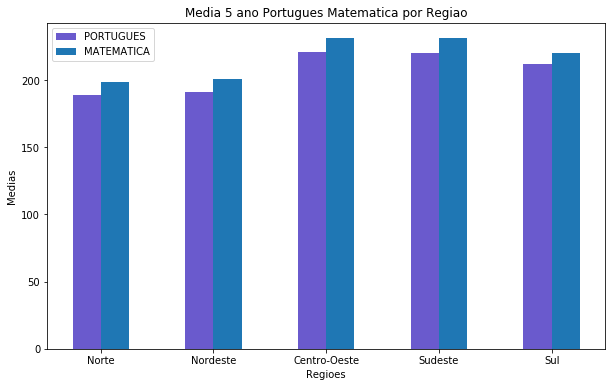

In [86]:
barWidth = 0.25
r1 = np.arange(len(regia_media_LP))
r2 = [x+barWidth for x in r1]

plt.figure(figsize=(10,6))

plt.bar(r1, regia_media_LP, color='#6A5ACD' , width=barWidth, label="PORTUGUES")
plt.bar(r2, regia_media_MT, width=barWidth, label="MATEMATICA")

plt.xticks([r+(barWidth/2) for r in range(len(regia_media_LP))],['Norte','Nordeste','Centro-Oeste','Sudeste','Sul'])
plt.xlabel('Regioes')
plt.ylabel('Medias')
plt.title('Media 5 ano Portugues Matematica por Regiao')
plt.legend()
plt.show()

In [110]:
df7[df7['CO_REGIAO']==2].sort_values(by='MEDIA_5EF_LP', ascending=False).head(5)

,ID_PROVA_BRASIL,ID_UF,ID_MUNICIPIO,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,...,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF,cod,regiao,NM_UF,Capital,NM_UF_SIGLA,MEDIA_TOTAL_5EF
25508,2017,27,2702306,27042863,3,2,69.6,41.4,0.0,Grupo 2,...,0.0,0.0,0.0,0.0,2.0,Nordeste,Alagoas,MaceiÃ³,AL,344.00
17597,2017,23,2310506,23118547,3,2,22.2,9.5,0.0,0,...,0.0,0.0,0.0,0.0,2.0,Nordeste,CearÃ¡,Fortaleza,CE,312.60
18114,2017,23,2312908,23220058,3,1,85.7,41.7,0.0,Grupo 2,...,0.0,0.0,0.0,0.0,2.0,Nordeste,CearÃ¡,Fortaleza,CE,324.90
25679,2017,27,2703759,27042774,3,2,35.0,8.3,0.0,Grupo 1,...,0.0,0.0,0.0,0.0,2.0,Nordeste,Alagoas,MaceiÃ³,AL,303.76
18097,2017,23,2312908,23026014,3,1,86.6,35.3,0.0,Grupo 2,...,0.0,0.0,0.0,0.0,2.0,Nordeste,CearÃ¡,Fortaleza,CE,329.64


In [114]:
df7[df7['CO_REGIAO']==2].sort_values(by='MEDIA_5EF_MT', ascending=False).head(5)

,ID_PROVA_BRASIL,ID_UF,ID_MUNICIPIO,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,...,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF,cod,regiao,NM_UF,Capital,NM_UF_SIGLA,MEDIA_TOTAL_5EF
18104,2017,23,2312908,23026340,3,2,60.0,44.4,0.0,0,...,0.0,0.0,0.0,0.0,2.0,Nordeste,CearÃ¡,Fortaleza,CE,351.47
25508,2017,27,2702306,27042863,3,2,69.6,41.4,0.0,Grupo 2,...,0.0,0.0,0.0,0.0,2.0,Nordeste,Alagoas,MaceiÃ³,AL,344.00
18090,2017,23,2312908,23025719,3,1,57.1,32.1,0.0,Grupo 2,...,0.0,0.0,0.0,0.0,2.0,Nordeste,CearÃ¡,Fortaleza,CE,333.47
16269,2017,23,2304707,23005963,3,2,24.1,22.2,0.0,0,...,0.0,0.0,0.0,0.0,2.0,Nordeste,CearÃ¡,Fortaleza,CE,333.23
16263,2017,23,2304707,23005645,3,1,13.8,0.0,0.0,0,...,0.0,0.0,0.0,0.0,2.0,Nordeste,CearÃ¡,Fortaleza,CE,331.71


In [111]:
#[c for c in df7.columns]

In [113]:
#[y for y in df7['NIVEL_9_MT5']]

In [ ]:
col = ['CO_ENTIDADE','CO_REGIAO']
#colunas = ['ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'NIVEL_SOCIO_ECONOMICO', 'NU_MATRICULADOS_CENSO_5EF', 'NU_PRESENTES_5EF', 'TAXA_PARTICIPACAO_5EF', 'MEDIA_5EF_LP', 'MEDIA_5EF_MT', 'MEDIA_9EF_LP', 'MEDIA_9EF_MT', 'MEDIA_3EM_LP', 'MEDIA_3EM_MT']
#df_TS_ESC.loc[:, col]
df = df_ESC.loc[:, col]
#df
#df_TS_ESC.loc[:, col].to_csv(r'export_dataframe.csv', index=False,  header=True)

In [ ]:
#list(filter(lambda x: x % 2 == 0, df_ESC.loc[:,'CO_ENTIDADE'], ))

In [91]:
#df_PU_ESC = pd.merge(df_PU_ESC, df, on='CO_ENTIDADE', how='left')

df_PU_ESC = df_PU_ESC.fillna(0)

df_PU_ESC['MEDIA_TOTAL_5EF'] = list(map(lambda a, b: ((a + b)/2), df_PU_ESC.loc[:,'MEDIA_5EF_MT'], df_PU_ESC.loc[:,'MEDIA_5EF_MT']))

#df_PU_ESC

In [ ]:
#maior = list(reduce((lambda x,y: x if(x>y) else y ), df_PU_ESC[:,'MEDIA_TOTAL_5EF']))
#df_PU_ESC['MEDIA_TOTAL_5EF'].sum()

In [92]:
df_PU_ESC['MEDIA_TOTAL_5EF'].mean() #media do brasil 5 ano 

143.3916774337892

In [93]:
df_PU_ESC['MEDIA_TOTAL_5EF'].max() #a maio media do

351.47

In [94]:
#df1 = df_PU_ESC.sort_values(by='MEDIA_TOTAL_5EF', ascending=False).head(5)

In [ ]:
#df5 = pd.merge(df, df1, on='CO_ENTIDADE')

In [ ]:
#df5

In [ ]:
#pd.merge(df_PU_ESC, df, on='CO_ENTIDADE', how='left')

In [ ]:
#[x for x in df_TS_ESC.columns]

In [97]:
#col = ['ID_PROVA_BRASIL','ID_UF','ID_MUNICIPIO','ID_ESCOLA','ID_DEPENDENCIA_ADM','ID_LOCALIZACAO','MEDIA_5EF_LP','MEDIA_5EF_MT','TAXA_PARTICIPACAO_5EF']
#df6 = df_TS_ESC.loc[:, col] 
#df6['MEDIA_TOTAL_5EF'] = list(map(lambda a, b: ((a + b)/2), df6.loc[:,'MEDIA_5EF_MT'], df6.loc[:,'MEDIA_5EF_MT']))
#df6.fillna(0)